In [11]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff


Norms for the untargeted bb attack

In [12]:
df_clean = pd.read_csv("Optimal myBB uninit obs.csv",header=None, dtype='float32')
df_adv = pd.read_csv("Optimal myBB uninit adv obs.csv", header=None, dtype='float32')
adv_norms = (df_adv - df_clean).apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

In [13]:
df_clean = pd.read_csv("Helpful myBB uninit obs.csv",header=None, dtype='float32')
df_adv = pd.read_csv("Helpful myBB uninit adv obs.csv", header=None, dtype='float32')
helpful_norms = (df_adv - df_clean).apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

In [14]:
df_norms = pd.concat([helpful_norms,adv_norms], axis='columns')
df_norms.columns = ['Helpful_Adversary','Optimal_Adversary']

<Axes: title={'center': 'KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks'}, ylabel='Density'>

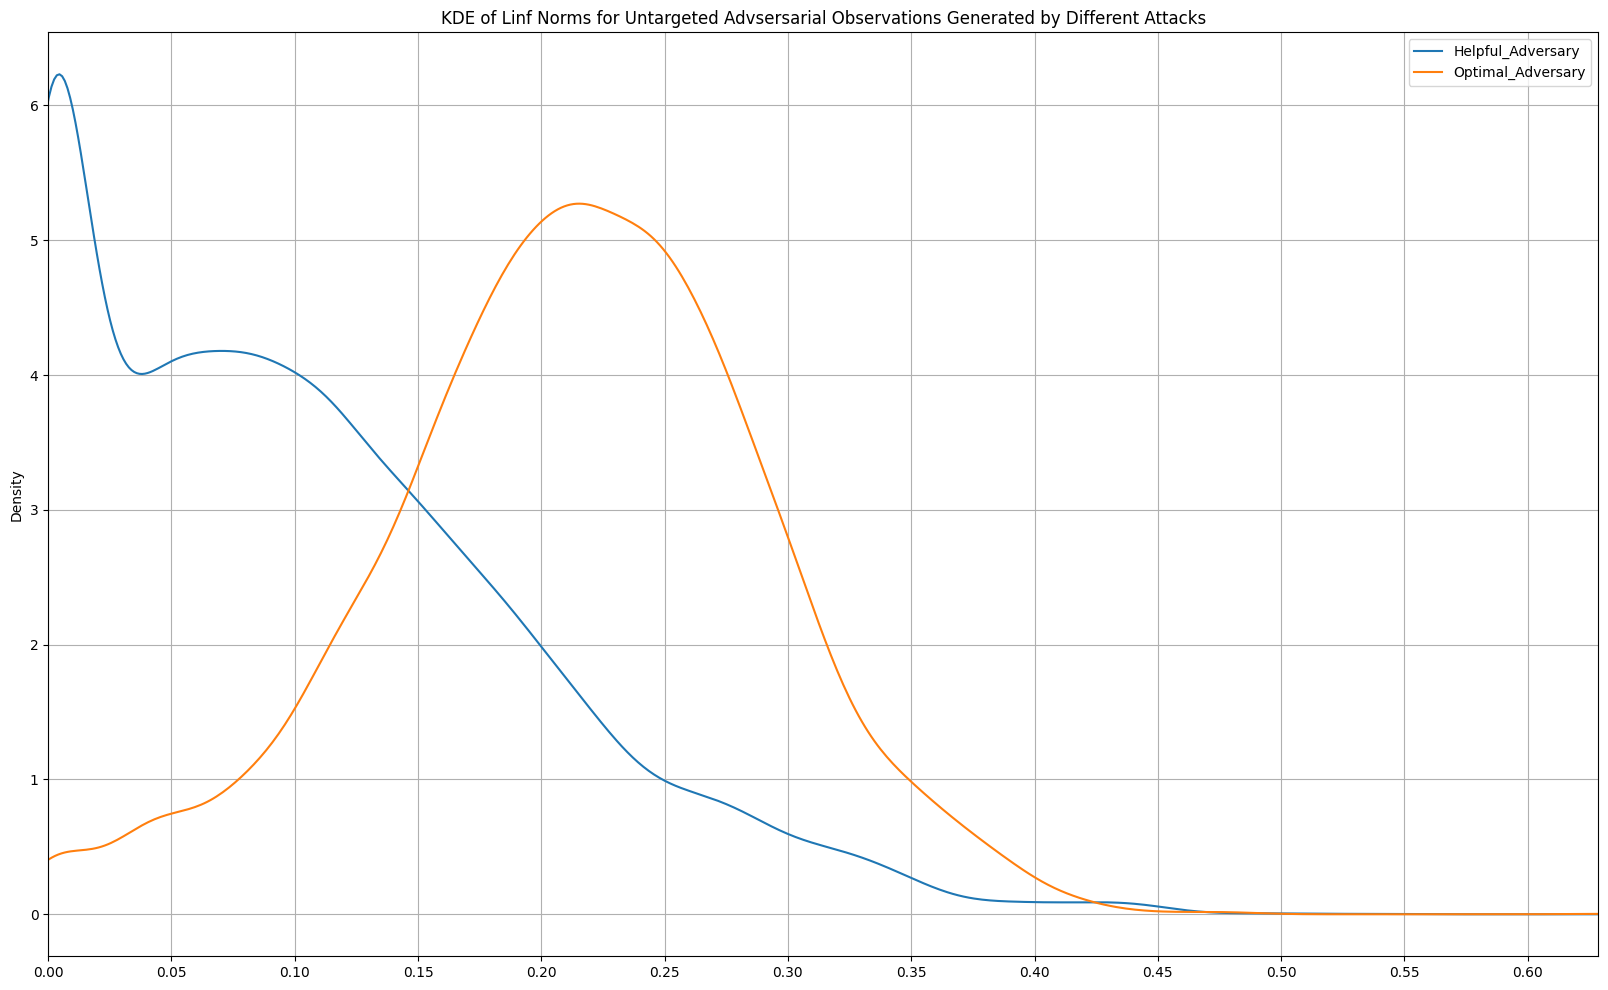

In [15]:
df_norms.plot.kde(grid=True, 
                   xticks=np.arange(start=adv_norms.min(), stop=adv_norms.max(), step=0.05),
                   figsize=(20,12),
                   xlim=[adv_norms.min(),adv_norms.max()], #NB the max/min of a df is a series, and we need the max/min of the series
                   title='KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks',
                   xlabel='Linf Norms',
                   legend=True
                   )

In [17]:
fig = ff.create_distplot(df_norms.values.transpose(),
                   df_norms.columns.to_list(),
                   bin_size=0.01,
                   show_rug=False
                   ).update_layout(
                       title_text='Density Plot of Normalized Distance Between Original and Adversarial Observations During Helpful Targeted BB Attack'
                   )
fig.update_xaxes(title_text='L Infinity Noramlized Distance from Original Observation')
fig.update_yaxes(title_text='Density')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'autobinx': False,
              'histnorm': 'probability density',
              'legendgroup': 'Helpful_Adversary',
              'marker': {'color': 'rgb(31, 119, 180)'},
              'name': 'Helpful_Adversary',
              'opacity': 0.7,
              'type': 'histogram',
              'x': array([0.19728273, 0.19103336, 0.23095033, ..., 0.08013631, 0.18375969,
                          0.0121603 ], dtype=float32),
              'xaxis': 'x',
              'xbins': {'end': 0.5401420593261719, 'size': 0.01, 'start': 0.0},
              'yaxis': 'y'},
             {'autobinx': False,
              'histnorm': 'probability density',
              'legendgroup': 'Optimal_Adversary',
              'marker': {'color': 'rgb(255, 127, 14)'},
              'name': 'Optimal_Adversary',
              'opacity': 0.7,
              'type': 'histogram',
              'x': array([0.19054031, 0.06221676, 0.18597984, ..., 0.3578081 , 0.19729519,
                          0.23155686], dtype=float32),
              'xaxis': 'x',
              'xbins': {'end': 0.6285724639892578, 'size': 0.01, 'start': 0.0},
              'yaxis': 'y'},
             {'legendgroup': 'Helpful_Adversary',
              'marker': {'color': 'rgb(31, 119, 180)'},
              'mode': 'lines',
              'name': 'Helpful_Adversary',
              'showlegend': False,
              'type': 'scatter',
              'x': [0.0, 0.0010802841186523437, 0.0021605682373046875, ...,
                    0.5369012069702148, 0.5379814910888672, 0.5390617752075195],
              'xaxis': 'x',
              'y': array([6.03754841e+00, 6.12149480e+00, 6.18154131e+00, ..., 3.31674089e-03,
                          3.31196441e-03, 3.29766596e-03]),
              'yaxis': 'y'},
             {'legendgroup': 'Optimal_Adversary',
              'marker': {'color': 'rgb(255, 127, 14)'},
              'mode': 'lines',
              'name': 'Optimal_Adversary',
              'showlegend': False,
              'type': 'scatter',
              'x': [0.0, 0.0012571449279785156, 0.0025142898559570312, ...,
                    0.6248010292053222, 0.6260581741333008, 0.6273153190612792],
              'xaxis': 'x',
              'y': array([0.40419049, 0.41830191, 0.43050842, ..., 0.00342715, 0.0035119 ,
                          0.00356374]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'overlay',
               'hovermode': 'closest',
               'legend': {'traceorder': 'reversed'},
               'template': '...',
               'title': {'text': ('Density Plot of Normalized Dis' ... 'ing Helpful Targeted BB Attack')},
               'xaxis': {'anchor': 'y2',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'L Infinity Noramlized Distance from Original Observation'},
                         'zeroline': False},
               'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0, 'title': {'text': 'Density'}}}
})

Spike on left represents unchanged observations, this is much clearer from the displot compared to KDE